In [61]:
import pandas as pd
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.lines import Line2D 
import statsmodels.api as sm


In [62]:
hcap = pd.read_csv('/Users/novak/ZhangYS Dropbox/Shared/HCAP/python file/hrs-hcap.csv')
hcap = hcap.dropna()

hcap['zbcsid'] = zscore(hcap['bcsid'])

In [63]:
mex_cog = pd.read_csv('/Users/novak/ZhangYS Dropbox/Shared/HCAP/python file/mex-cog.csv')
mex_cog = mex_cog[mex_cog['rage'] >= 65]
mex_cog['zbcsid'] = zscore(mex_cog['bcsid'])

def categorize_reduc(value):
    if pd.isna(value):
        return 'NA'
    elif value == 0:
        return '0'
    elif 0 < value <= 6:
        return '1'
    else:
        return '2'

# Apply the mapping function to create 'reduc_cat'
mex_cog['reduc_cat'] = mex_cog['reduc'].apply(categorize_reduc)

mex_cog = mex_cog.dropna()

mex_cog = mex_cog[mex_cog['wgt'] != 0]

In [64]:
mex_cog_educ0 = mex_cog[mex_cog['reduc'] == 0]
mex_cog_educ1 = mex_cog[(mex_cog['reduc'] > 0) & (mex_cog['reduc'] <= 6)]
mex_cog_educ2 = mex_cog[mex_cog['reduc'] > 6]

# def filter_middle_95(df, column):
#     lower_bound = df[column].quantile(0.025)
#     upper_bound = df[column].quantile(0.975)
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# mex_cog_educ0 = filter_middle_95(mex_cog_educ0, 'fgcp')
# mex_cog_educ1 = filter_middle_95(mex_cog_educ1, 'fgcp')
# mex_cog_educ2 = filter_middle_95(mex_cog_educ2, 'fgcp')


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


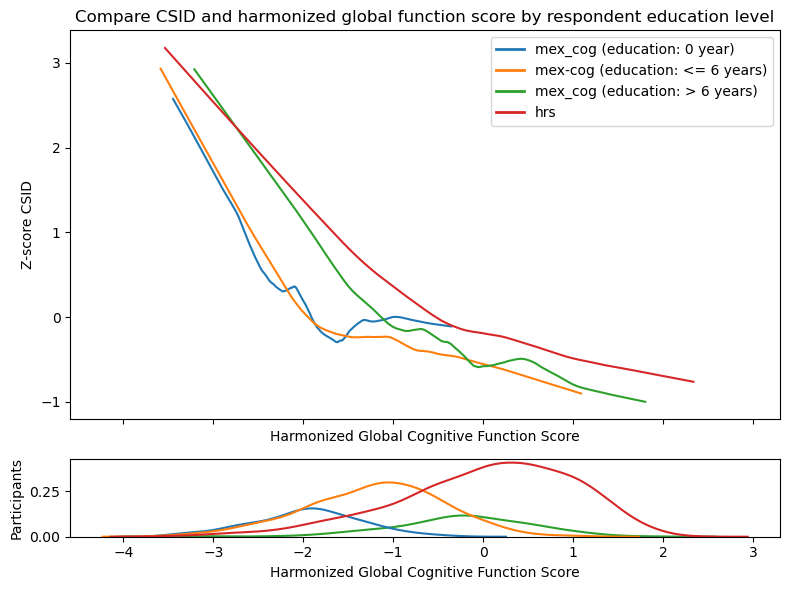

In [65]:
# Get the default seaborn color palette that is used in the histogram
palette = sns.color_palette('tab10', 4)  

colors = {'level1': palette[0], 'level2': palette[1], 'level3': palette[2], 'level4': palette[3]} 

custom_palette = {
    '0': colors['level1'],
    '1': colors['level2'],
    '2': colors['level3']
}

# respondent with 0 education year 
lowess_educ0 = lowess(endog=mex_cog_educ0['zbcsid'], exog=mex_cog_educ0['fgcp'], frac=0.35)
# x_hrs1, y_hrs1, y_std_hrs1 = rolling_std(lowess_hrs1[:, 0], lowess_hrs1[:, 1])

# respondent with less than 6 education years 
lowess_educ1 = lowess(endog=mex_cog_educ1['zbcsid'], exog=mex_cog_educ1['fgcp'], frac=0.35)
# x_hrs0, y_hrs0, y_std_hrs0 = rolling_std(lowess_hrs0[:, 0], lowess_hrs0[:, 1])

# respondent with more than 6 education years
lowess_educ2 = lowess(endog=mex_cog_educ2['zbcsid'], exog=mex_cog_educ2['fgcp'], frac=0.35)

# respondent from hrs 
lowess_3 = lowess(endog=hcap['zbcsid'], exog=hcap['fgcp'], frac=0.35)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1]}, figsize=(8, 6))


ax1.plot(lowess_educ0[:, 0], lowess_educ0[:, 1], color = colors['level1'])
ax1.plot(lowess_educ1[:, 0], lowess_educ1[:, 1], color = colors['level2'])
ax1.plot(lowess_educ2[:, 0], lowess_educ2[:, 1], color = colors['level3'])
ax1.plot(lowess_3[:, 0], lowess_3[:, 1], color = colors['level4'])
ax1.set_ylabel('Z-score CSID')  
ax1.set_title('Compare CSID and harmonized global function score by respondent education level')
ax1.set_xlabel('Harmonized Global Cognitive Function Score')
legend_lines = [Line2D([0], [0], color=colors['level1'], lw=2, label='mex_cog (education: 0 year)'),
                Line2D([0], [0], color=colors['level2'], lw=2, label='mex-cog (education: <= 6 years)'), 
                Line2D([0], [0], color=colors['level3'], lw=2, label='mex_cog (education: > 6 years)'), 
                Line2D([0], [0], color=colors['level4'], lw=2, label='hrs')]
ax1.legend(handles=legend_lines)


sns.kdeplot(data=mex_cog, x='fgcp', hue='reduc_cat', palette=custom_palette, ax=ax2, legend=False)
sns.kdeplot(data=hcap, x='fgcp', color=colors['level4'], ax=ax2, label='hrs', legend=False)
ax2.set_ylabel('Participants') 
ax2.set_xlabel('Harmonized Global Cognitive Function Score')


plt.tight_layout()

plt.show()


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


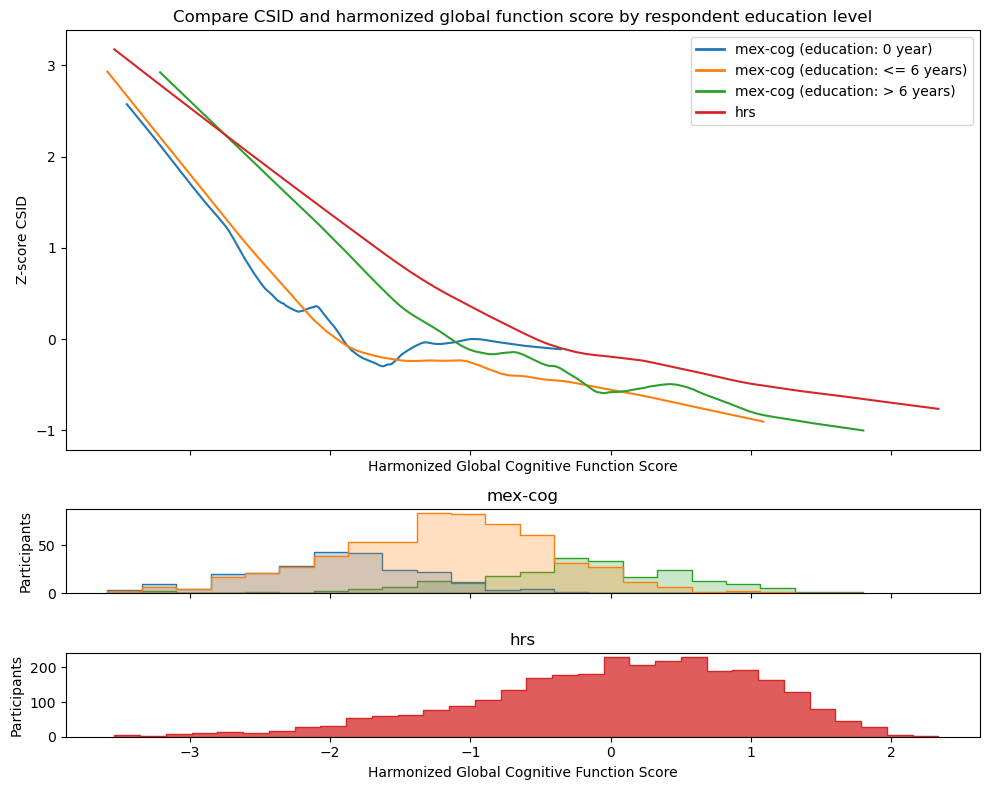

In [66]:
# Get the default seaborn color palette that is used in the histogram
palette = sns.color_palette('tab10', 4)  

colors = {'level1': palette[0], 'level2': palette[1], 'level3': palette[2], 'level4': palette[3]} 
custom_palette = {
    '0': colors['level1'],
    '1': colors['level2'],
    '2': colors['level3']
}

# respondent with 0 education year 
lowess_educ0 = lowess(endog=mex_cog_educ0['zbcsid'], exog=mex_cog_educ0['fgcp'], frac=0.35)
# x_hrs1, y_hrs1, y_std_hrs1 = rolling_std(lowess_hrs1[:, 0], lowess_hrs1[:, 1])

# respondent with less than 6 education years 
lowess_educ1 = lowess(endog=mex_cog_educ1['zbcsid'], exog=mex_cog_educ1['fgcp'], frac=0.35)
# x_hrs0, y_hrs0, y_std_hrs0 = rolling_std(lowess_hrs0[:, 0], lowess_hrs0[:, 1])

# respondent with more than 6 education years
lowess_educ2 = lowess(endog=mex_cog_educ2['zbcsid'], exog=mex_cog_educ2['fgcp'], frac=0.35)

# respondent from hrs 
lowess_3 = lowess(endog=hcap['zbcsid'], exog=hcap['fgcp'], frac=0.35)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(10, 8))


ax1.plot(lowess_educ0[:, 0], lowess_educ0[:, 1], color = colors['level1'])
ax1.plot(lowess_educ1[:, 0], lowess_educ1[:, 1], color = colors['level2'])
ax1.plot(lowess_educ2[:, 0], lowess_educ2[:, 1], color = colors['level3'])
ax1.plot(lowess_3[:, 0], lowess_3[:, 1], color = colors['level4'])
ax1.set_ylabel('Z-score CSID')  
ax1.set_title('Compare CSID and harmonized global function score by respondent education level')
ax1.set_xlabel('Harmonized Global Cognitive Function Score')
legend_lines = [Line2D([0], [0], color=colors['level1'], lw=2, label='mex-cog (education: 0 year)'),
                Line2D([0], [0], color=colors['level2'], lw=2, label='mex-cog (education: <= 6 years)'), 
                Line2D([0], [0], color=colors['level3'], lw=2, label='mex-cog (education: > 6 years)'), 
                Line2D([0], [0], color=colors['level4'], lw=2, label='hrs')]
ax1.legend(handles=legend_lines)


sns.histplot(data=mex_cog, x='fgcp', hue='reduc_cat', ax=ax2, palette = custom_palette, element='step', legend=False)
ax2.set_ylabel('Participants') 
ax2.set_xlabel('Harmonized Global Cognitive Function Score')
ax2.set_title('mex-cog')

sns.histplot(data=hcap, x='fgcp', color=colors['level4'], ax=ax3, element='step', label='hrs', legend=False)
ax3.set_ylabel('Participants') 
ax3.set_xlabel('Harmonized Global Cognitive Function Score')
ax3.set_title('hrs')


plt.tight_layout()

plt.show()


In [67]:
mex_cog_fgcp = pd.DataFrame()
mex_cog_fgcp['educ0'] = mex_cog_educ0['fgcp'].describe()
mex_cog_fgcp['educ1'] = mex_cog_educ1['fgcp'].describe()
mex_cog_fgcp['educ2'] = mex_cog_educ2['fgcp'].describe()
mex_cog_fgcp

,educ0,educ1,educ2
count,236.000000,599.000000,220.000000
mean,-1.954987,-1.205549,-0.236136
std,0.605702,0.773129,0.773325
min,-3.447000,-3.585000,-3.210000
25%,-2.333500,-1.726000,-0.649500
50%,-1.922500,-1.146000,-0.205500
75%,-1.564500,-0.691000,0.284000
max,-0.356000,1.088000,1.801000


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


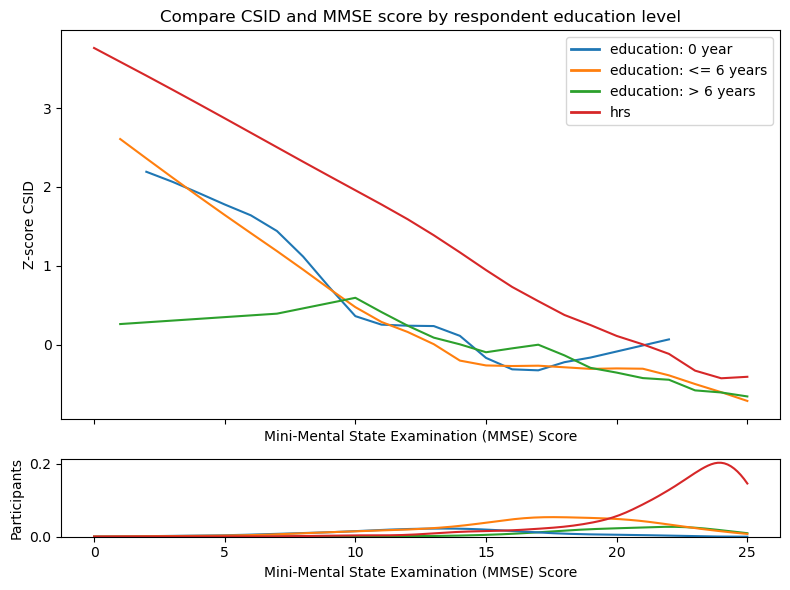

In [68]:
# Get the default seaborn color palette that is used in the histogram
palette = sns.color_palette('tab10', 4)  

colors = {'level1': palette[0], 'level2': palette[1], 'level3': palette[2], 'level4': palette[3]} 

custom_palette = {
    '0': colors['level1'],
    '1': colors['level2'],
    '2': colors['level3']
}

# respondent with 0 education year 
lowess_educ0 = lowess(endog=mex_cog_educ0['zbcsid'], exog=mex_cog_educ0['mmse_25'], frac=0.35)
# x_hrs1, y_hrs1, y_std_hrs1 = rolling_std(lowess_hrs1[:, 0], lowess_hrs1[:, 1])

# respondent with less than 6 education years 
lowess_educ1 = lowess(endog=mex_cog_educ1['zbcsid'], exog=mex_cog_educ1['mmse_25'], frac=0.35)
# x_hrs0, y_hrs0, y_std_hrs0 = rolling_std(lowess_hrs0[:, 0], lowess_hrs0[:, 1])

# respondent with more than 6 education years
lowess_educ2 = lowess(endog=mex_cog_educ2['zbcsid'], exog=mex_cog_educ2['mmse_25'], frac=0.35)

# respondent from hrs 
lowess_3 = lowess(endog=hcap['zbcsid'], exog=hcap['mmse'], frac=0.35)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1]}, figsize=(8, 6))


ax1.plot(lowess_educ0[:, 0], lowess_educ0[:, 1], color = colors['level1'])
ax1.plot(lowess_educ1[:, 0], lowess_educ1[:, 1], color = colors['level2'])
ax1.plot(lowess_educ2[:, 0], lowess_educ2[:, 1], color = colors['level3'])
ax1.plot(lowess_3[:, 0], lowess_3[:, 1], color = colors['level4'])
ax1.set_ylabel('Z-score CSID')  
ax1.set_title('Compare CSID and MMSE score by respondent education level')
ax1.set_xlabel('Mini-Mental State Examination (MMSE) Score')
legend_lines = [Line2D([0], [0], color=colors['level1'], lw=2, label='education: 0 year'),
                Line2D([0], [0], color=colors['level2'], lw=2, label='education: <= 6 years'), 
                Line2D([0], [0], color=colors['level3'], lw=2, label='education: > 6 years'),
                Line2D([0], [0], color=colors['level4'], lw=2, label='hrs')]
ax1.legend(handles=legend_lines)


sns.kdeplot(data=mex_cog, x='mmse_25', hue='reduc_cat', ax=ax2, palette=custom_palette, clip = (0.0, 25.0), legend=False)
sns.kdeplot(data=hcap, x='mmse', color=colors['level4'], ax=ax2, clip = (0.0, 25.0), label='hrs', legend=False)
ax2.set_ylabel('Participants') 
ax2.set_xlabel('Mini-Mental State Examination (MMSE) Score')


plt.tight_layout()

plt.show()


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


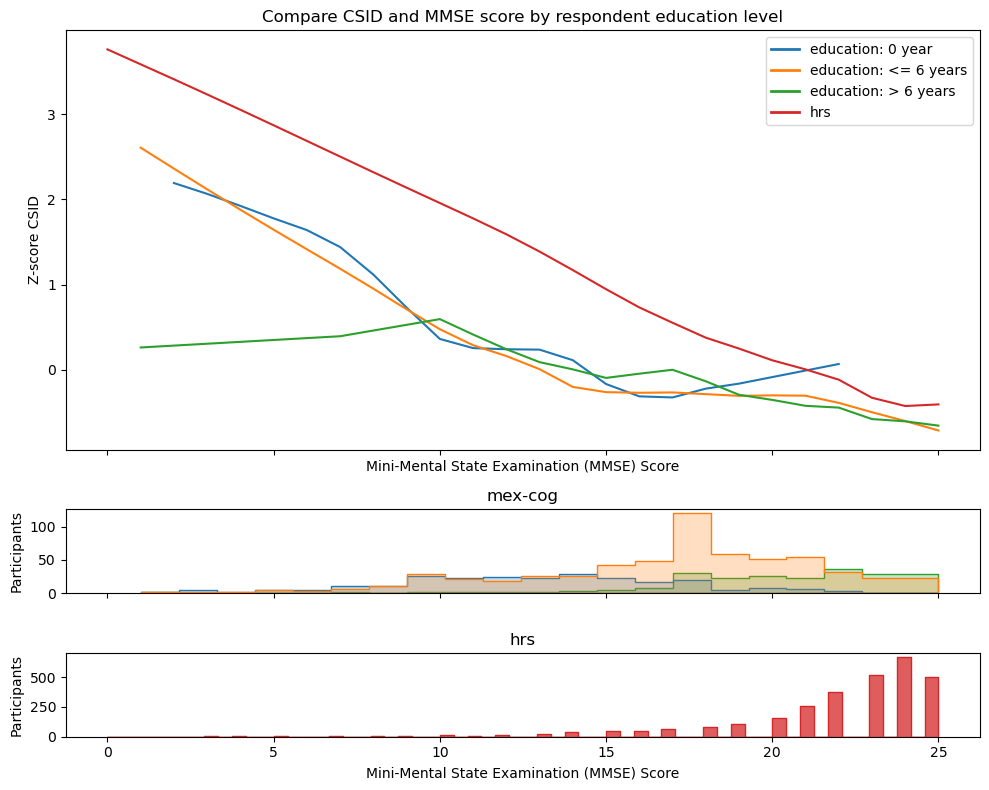

In [69]:
# Get the default seaborn color palette that is used in the histogram
palette = sns.color_palette('tab10', 4)  

colors = {'level1': palette[0], 'level2': palette[1], 'level3': palette[2], 'level4': palette[3]} 

custom_palette = {
    '0': colors['level1'],
    '1': colors['level2'],
    '2': colors['level3']
}

# respondent with 0 education year 
lowess_educ0 = lowess(endog=mex_cog_educ0['zbcsid'], exog=mex_cog_educ0['mmse_25'], frac=0.35)
# x_hrs1, y_hrs1, y_std_hrs1 = rolling_std(lowess_hrs1[:, 0], lowess_hrs1[:, 1])

# respondent with less than 6 education years 
lowess_educ1 = lowess(endog=mex_cog_educ1['zbcsid'], exog=mex_cog_educ1['mmse_25'], frac=0.35)
# x_hrs0, y_hrs0, y_std_hrs0 = rolling_std(lowess_hrs0[:, 0], lowess_hrs0[:, 1])

# respondent with more than 6 education years
lowess_educ2 = lowess(endog=mex_cog_educ2['zbcsid'], exog=mex_cog_educ2['mmse_25'], frac=0.35)

# respondent from hrs 
lowess_3 = lowess(endog=hcap['zbcsid'], exog=hcap['mmse'], frac=0.35)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]}, figsize=(10, 8))


ax1.plot(lowess_educ0[:, 0], lowess_educ0[:, 1], color = colors['level1'])
ax1.plot(lowess_educ1[:, 0], lowess_educ1[:, 1], color = colors['level2'])
ax1.plot(lowess_educ2[:, 0], lowess_educ2[:, 1], color = colors['level3'])
ax1.plot(lowess_3[:, 0], lowess_3[:, 1], color = colors['level4'])
ax1.set_ylabel('Z-score CSID')  
ax1.set_title('Compare CSID and MMSE score by respondent education level')
ax1.set_xlabel('Mini-Mental State Examination (MMSE) Score')
legend_lines = [Line2D([0], [0], color=colors['level1'], lw=2, label='education: 0 year'),
                Line2D([0], [0], color=colors['level2'], lw=2, label='education: <= 6 years'), 
                Line2D([0], [0], color=colors['level3'], lw=2, label='education: > 6 years'),
                Line2D([0], [0], color=colors['level4'], lw=2, label='hrs')]
ax1.legend(handles=legend_lines)

sns.histplot(data=mex_cog, x='mmse_25', hue='reduc_cat', ax=ax2, palette = custom_palette, element='step', legend=False)
ax2.set_ylabel('Participants') 
ax2.set_xlabel('Mini-Mental State Examination (MMSE) Score')
ax2.set_title('mex-cog')

sns.histplot(data=hcap, x='mmse', color=colors['level4'], ax=ax3, element='step', label='hrs', legend=False)
ax3.set_ylabel('Participants') 
ax3.set_xlabel('Mini-Mental State Examination (MMSE) Score')
ax3.set_title('hrs')

plt.tight_layout()

plt.show()


In [70]:
variables = ['rage', 'rfemale', 'reduc', 'iage', 'ifemale', 'ieduc', 
             'coresi', 'ispouse', 'ichild', 'iothfam', 'inonfam']

unweighted_summary_table = pd.DataFrame()

for var in variables:
    mex_cog[var] = pd.to_numeric(mex_cog[var], errors='coerce')
    summary_stats = mex_cog[var].describe()
    unweighted_summary_table[var] = summary_stats

unweighted_summary_table


,rage,rfemale,reduc,iage,ifemale,ieduc,coresi,ispouse,ichild,iothfam,inonfam
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,73.567773,0.546919,4.470142,52.800948,0.702370,8.732701,0.775355,0.379147,0.448341,0.070142,0.102370
std,6.819919,0.498030,4.104749,16.973308,0.457433,4.319391,0.417546,0.485405,0.497560,0.255508,0.303278
min,65.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,0.000000,1.000000,40.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,1.000000,3.000000,53.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,6.000000,67.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,103.000000,1.000000,17.000000,97.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000
